In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [8]:
def plotTotals(xs, ys, label):
    xvals = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S') for d in xs]
    plt.figure(figsize=(20,10))

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))


    y = [np.random.rand() for x in xvals]
    plt.plot(xvals, ys, marker='o', linestyle='--')
    plt.title("Totale casi (" + label + ")")
    plt.show()

In [9]:
def plotIncrements(xs, ys, label, N=5):
    xvals = [datetime.strptime(d, '%Y-%m-%dT%H:%M:%S') for d in xs]
    plt.figure(figsize=(20,10))
    ax = plt.subplot()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

    incr = [ys[i] - ys[i-1] for i in range(1, len(ys))]
    
    #Media mobile
    mns = list()
    for i in range(N-1, len(incr)):
        s = 0
        for j in range(i-N+1, i+1):
            s += incr[j] 
        mns.append(s/N)
    
    ax.plot(xvals[1:], incr, marker='o', linestyle='--', label="Raw data")
    ax.plot(xvals[N:], mns, marker='o', linestyle='-', label="Media mobile")
            
    plt.title("Incrementi (" + label + ")")
    ax.legend()
    plt.show()


# Italia

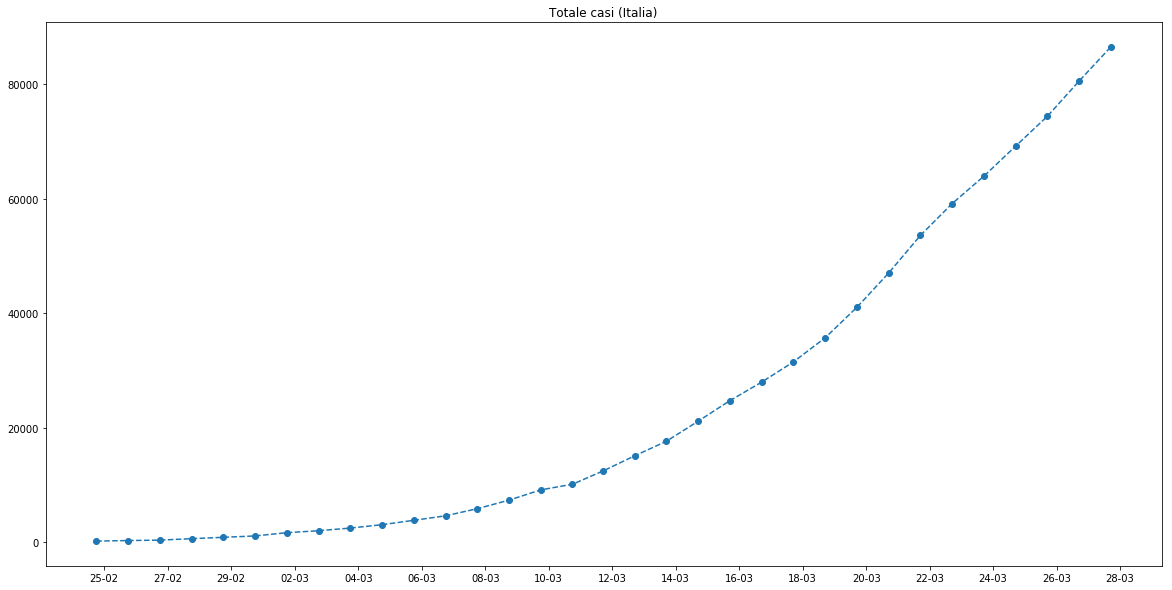

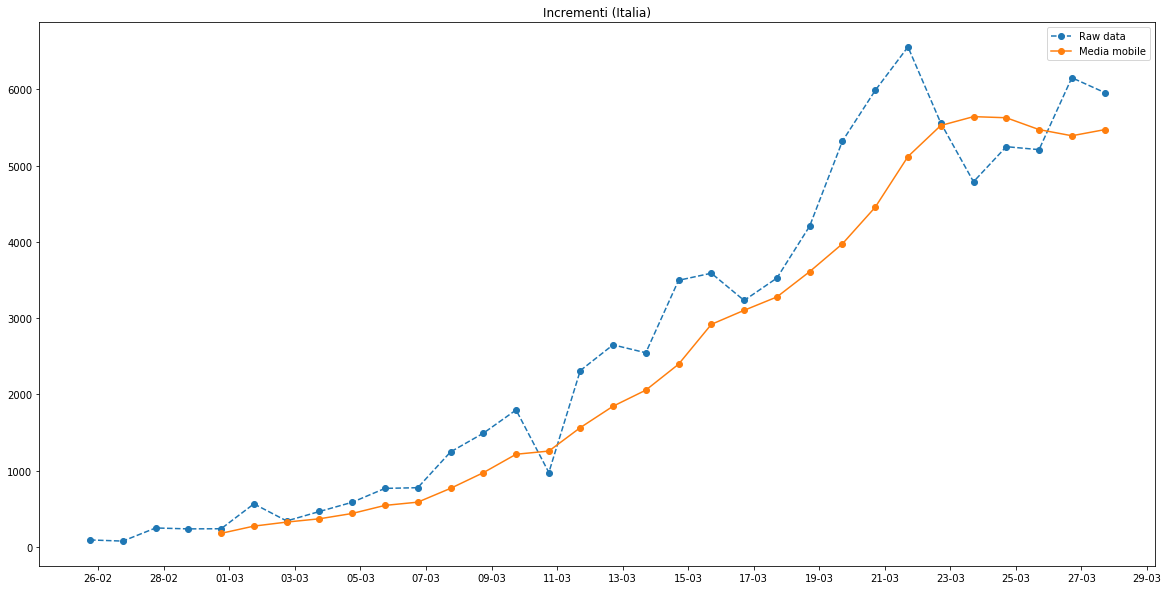

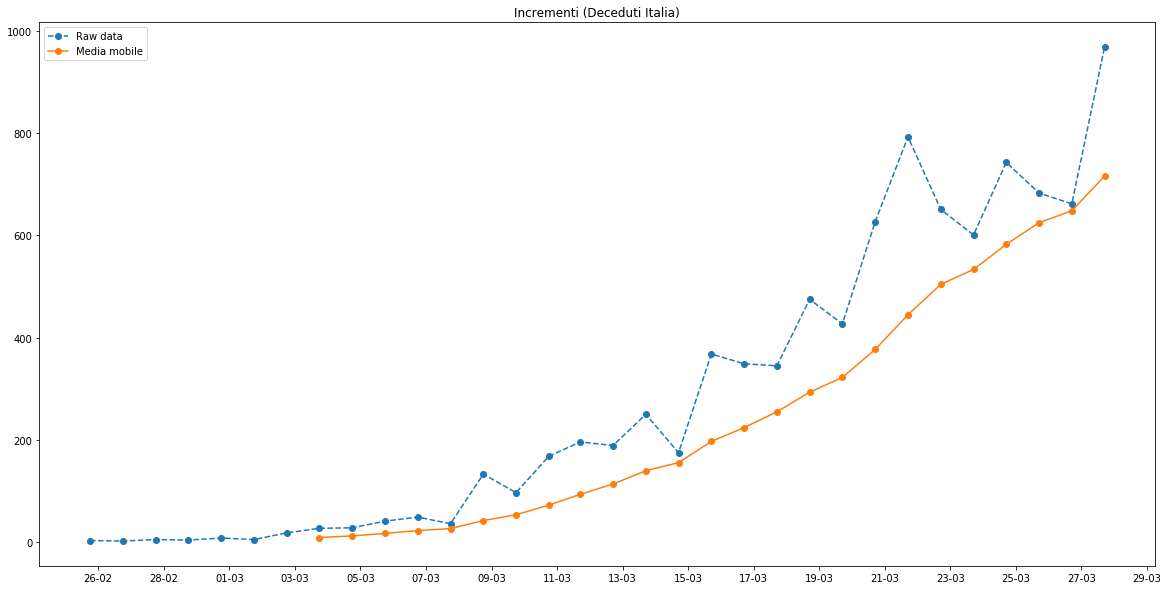

In [10]:
fileUrl = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(fileUrl)

plotTotals(df['data'], df['totale_casi'], 'Italia')
plotIncrements(df['data'], df['totale_casi'], 'Italia')
plotIncrements(df['data'], df['deceduti'], 'Deceduti Italia', 8)


# Toscana

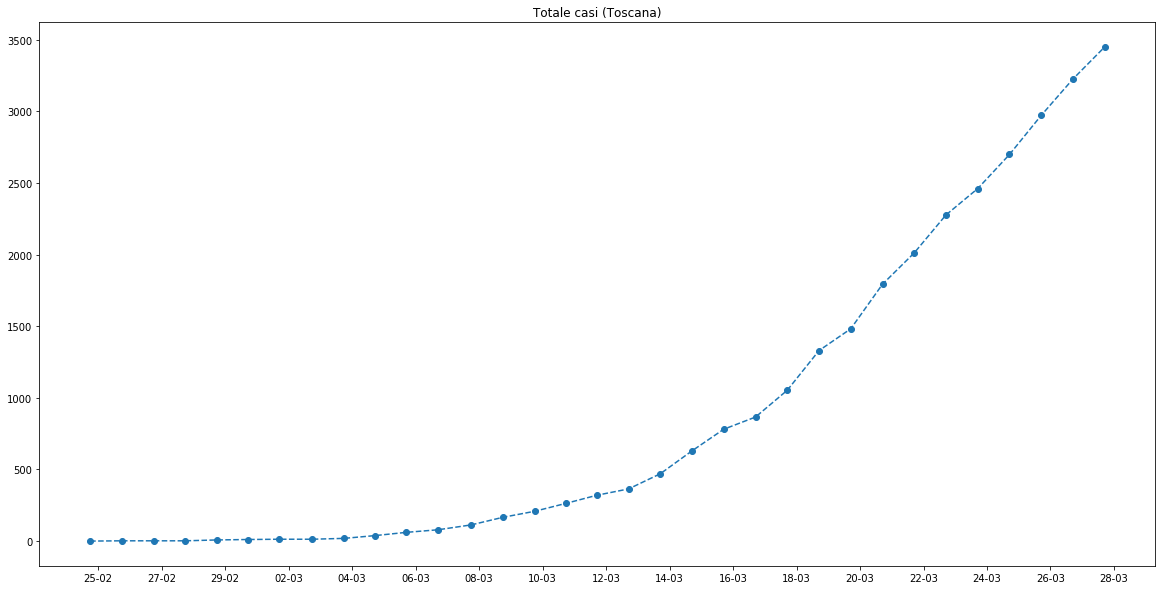

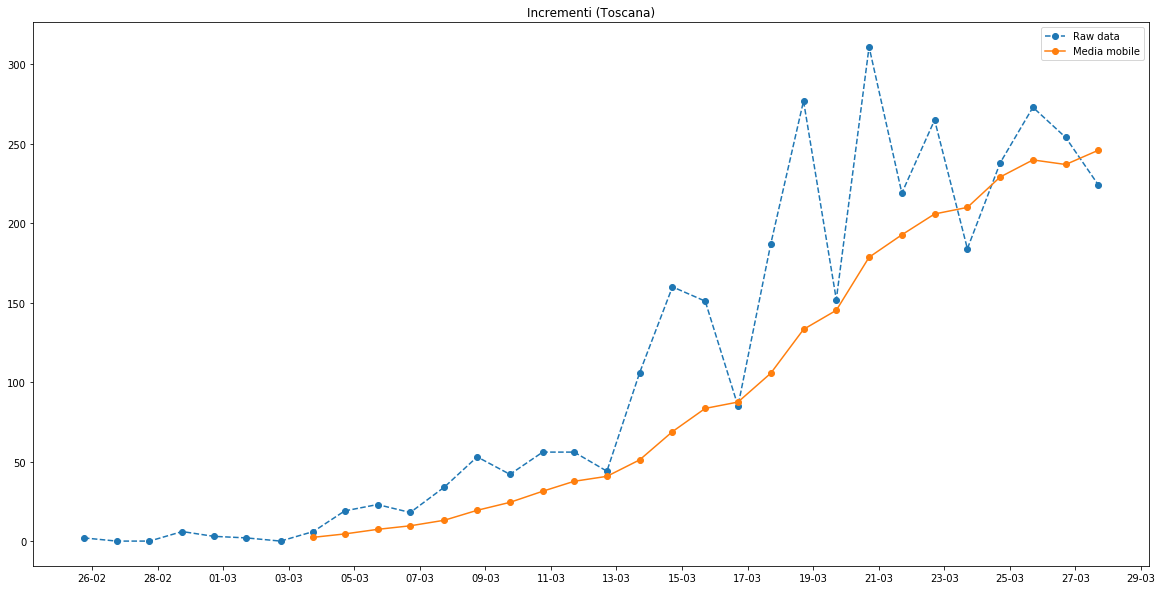

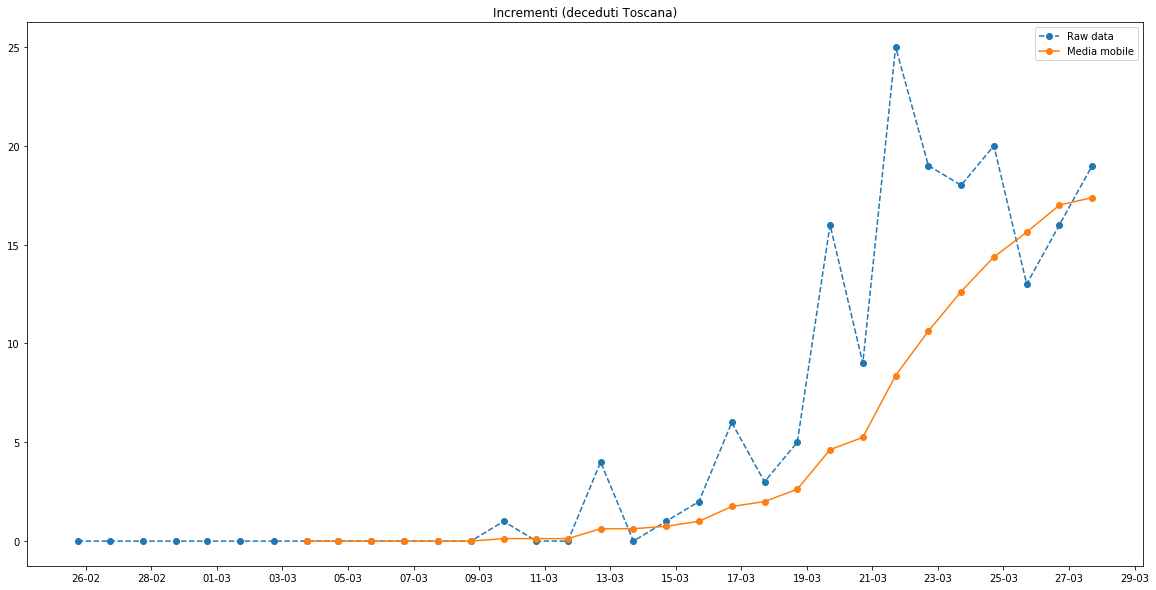

In [11]:
fileUrl = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
df = pd.read_csv(fileUrl)
regione = "Toscana"

ddf = df[df['denominazione_regione'] == regione].copy()

plotTotals(ddf['data'], ddf['totale_casi'], regione)
plotIncrements(ddf['data'], list(ddf['totale_casi']), regione, 8)
plotIncrements(ddf['data'], list(ddf['deceduti']), "deceduti " + regione, 8)

# Pisa

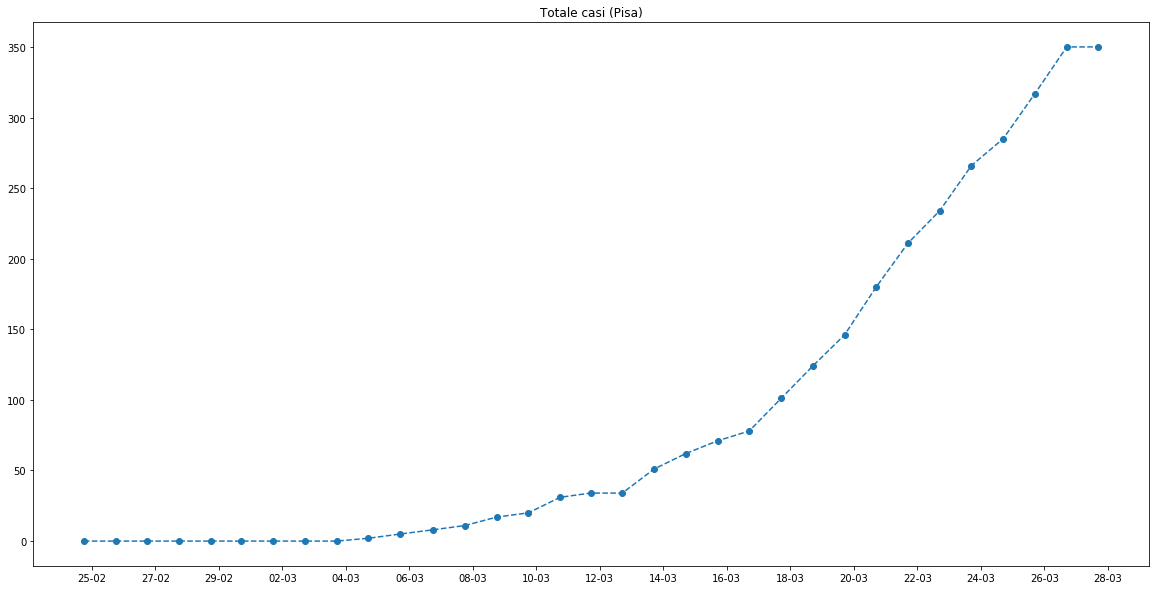

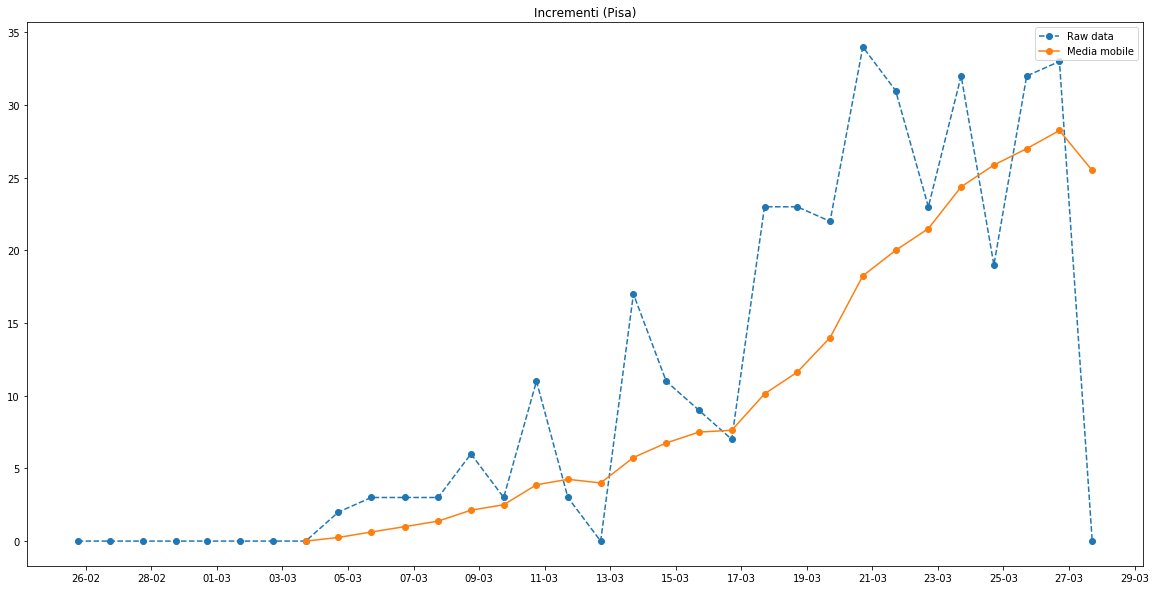

In [12]:
fileUrl = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
df = pd.read_csv(fileUrl)
provincia = "Pisa"

ddf = df[df['denominazione_provincia'] == provincia].copy()

plotTotals(ddf['data'], ddf['totale_casi'], provincia)
plotIncrements(ddf['data'], list(ddf['totale_casi']), provincia, 8)
